In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Train.csv")

In [2]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722
...,...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149,-80.110012
1596,-0.076099,0.255257,0.290054,1.796036,0.340350,118.315601
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520,-107.510508
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334,-47.341558


In [3]:
#5 features are features of air. Target is the final air quality index.

In [4]:
df.info() #it tells basic information about data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1600 non-null   float64
 1   feature_2  1600 non-null   float64
 2   feature_3  1600 non-null   float64
 3   feature_4  1600 non-null   float64
 4   feature_5  1600 non-null   float64
 5   target     1600 non-null   float64
dtypes: float64(6)
memory usage: 75.1 KB


In [5]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005,0.318835
std,0.997338,1.021776,1.011768,1.017189,0.978654,110.741562
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880,-71.897040
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527,-0.610665
75%,0.682118,0.645442,0.639130,0.646290,0.650089,71.226603
max,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


# Data Pre-Processing

In [6]:
df.isnull().sum()#checks and finds missing data points for each column

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

In [7]:
df=df.dropna()
df.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

# Data Visualization

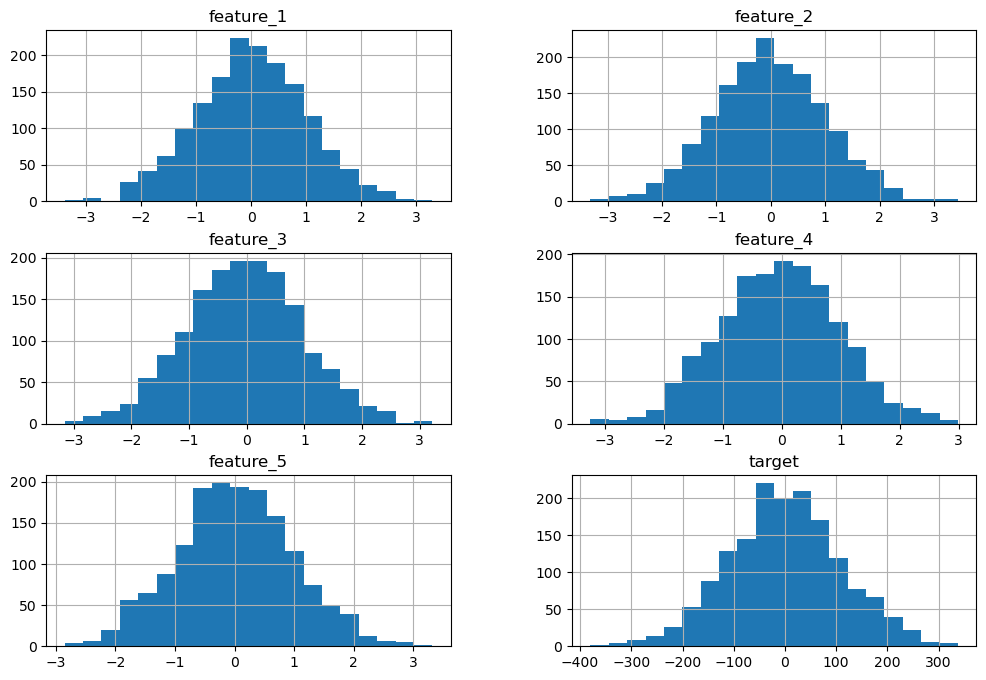

In [8]:
#Histogram
df.hist(figsize=(12,8),bins=20)
plt.show()

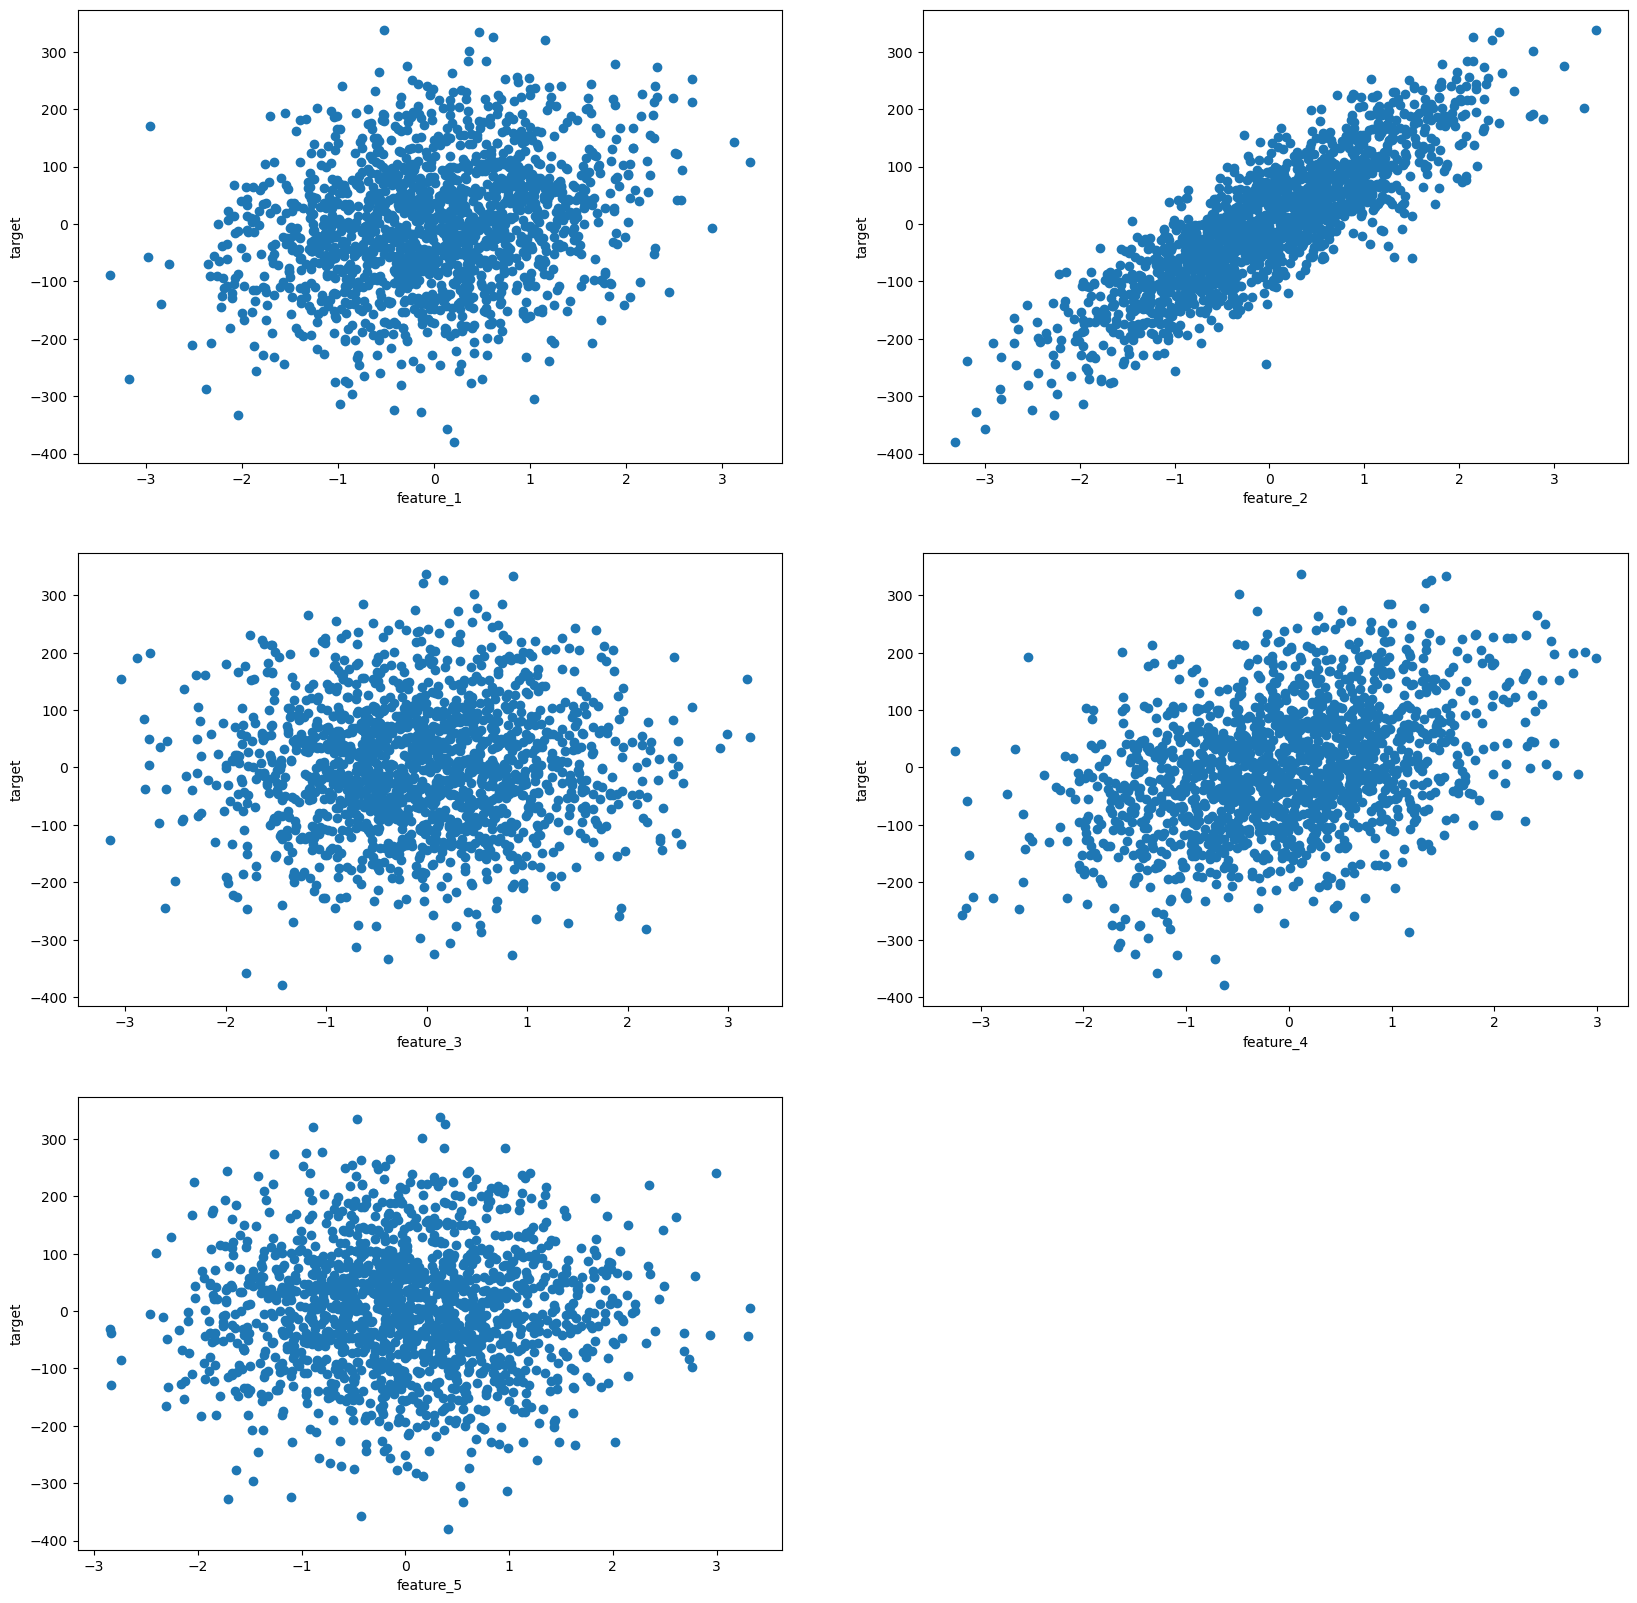

In [9]:
#Scatter Plot
plt.figure(figsize=(20,20))
for i,columns in enumerate(df.columns):
    if columns != 'target':
        plt.subplot(3,2,i+1)
        plt.scatter(x=df[columns],y=df['target'])
        plt.xlabel(columns)
        plt.ylabel('target')

<AxesSubplot:>

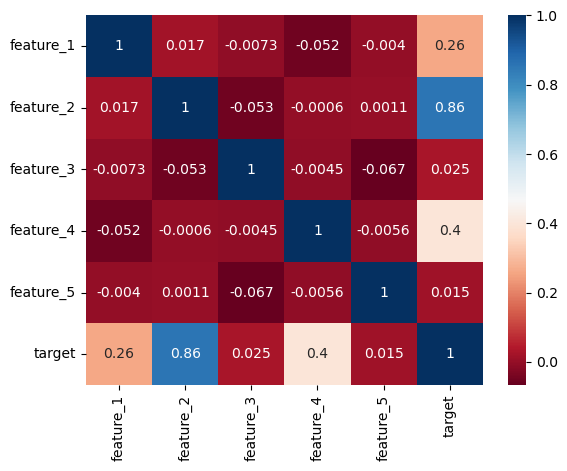

In [10]:
#heatmap
import seaborn as sns
corr_matrix=df.corr() #correlation function
sns.heatmap(corr_matrix,cmap='RdBu',annot=True)

# From heatmap, it clearly appears that feature 2 is in direct proportion with target.

# Feature 2 and 4 are more important than other parameters.

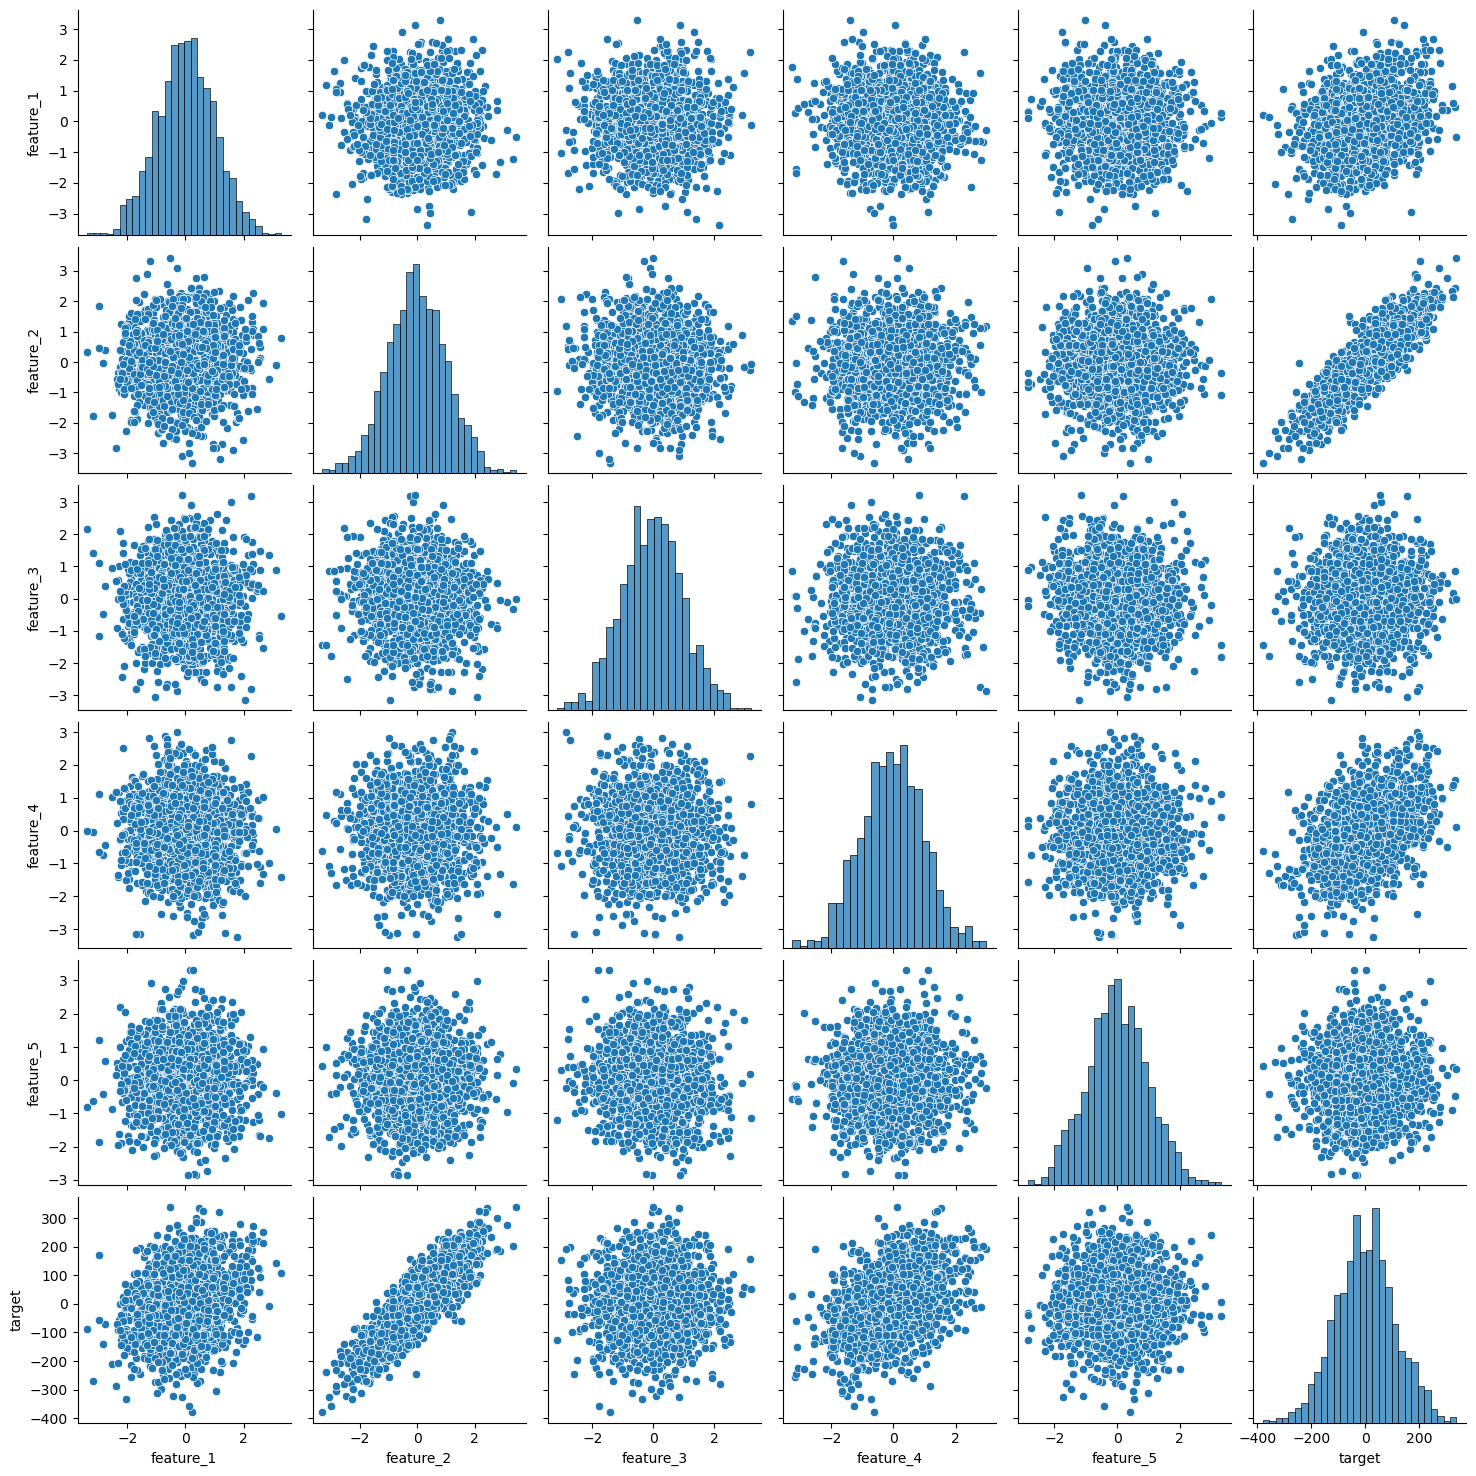

In [11]:
#pairplot
sns.pairplot(df) #plots every thing w.r.t every other thing
plt.show()

In [12]:
 df

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722
...,...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149,-80.110012
1596,-0.076099,0.255257,0.290054,1.796036,0.340350,118.315601
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520,-107.510508
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334,-47.341558


In [13]:
x=df.drop('target',axis=1)
y=df['target']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

# Machine Learning Modelling Part

In [15]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)

LinearRegression()

In [16]:
lr_preds_1=lr_reg.predict(x_test)
from sklearn.metrics import mean_squared_error
mse_1=mean_squared_error(y_test,lr_preds_1)
rmse_1=np.sqrt(mse_1)
print('PERFORMANCE:')
print('The mean squared error is {:.3f}'.format(mse_1))
print('The root mean squared error is {:.3f}'.format(rmse_1))

PERFORMANCE:
The mean squared error is 430.015
The root mean squared error is 20.737


In [17]:
lr_preds_1

array([-1.39846250e+02,  2.36894836e+01, -2.06766863e+01, -5.58987189e+01,
       -3.57577096e+01, -6.07059870e+01,  1.13798978e+02, -1.19473100e+02,
       -2.34369154e+02,  1.52544525e+01, -1.40349489e+02,  1.17883784e+01,
        2.19564726e+02, -4.89545112e+01, -1.02848349e+02,  8.45588331e+01,
       -1.51885387e+02, -1.85875453e+02,  2.03671343e+01,  2.20850628e+02,
        3.04132827e+01,  3.30609807e+01,  1.05315348e+02, -6.18015515e+01,
        2.37782496e+02,  4.57618887e+01,  1.90230473e+02, -9.25028278e+01,
        4.90528125e+01, -3.22939027e+01, -1.98947158e+02,  5.87064051e+01,
       -3.59129282e+01,  1.27419256e+02, -6.70767419e+01,  2.37974831e+02,
       -7.73361086e+01,  9.18739188e+01, -3.87088445e+01,  9.94251310e+01,
        4.86902413e+01, -8.45020360e+01, -1.96497875e+02, -1.47825302e+02,
       -2.46882091e+01,  3.60524096e+01, -5.60594105e+01, -1.22593875e+01,
       -9.51715867e+01,  7.84647746e+01, -1.68354362e+00,  1.49466913e+02,
       -6.01230797e+01, -

In [18]:
predicted_dataframe=pd.concat((x_test,y_test),axis=1)
predicted_dataframe['Predicted Target']=lr_preds_1

In [19]:
predicted_dataframe

,feature_1,feature_2,feature_3,feature_4,feature_5,target,Predicted Target
526,-1.388974,-0.579275,0.165478,-1.152241,0.215593,-130.704675,-139.846250
354,-0.469388,0.046899,-0.255776,0.730739,-0.675200,40.948583,23.689484
168,-0.908349,0.210797,-1.112608,-0.247731,0.776953,-42.893050,-20.676686
135,0.599657,-1.215359,0.507227,0.713332,-0.775190,-60.680781,-55.898719
937,-0.017961,-0.128795,-1.487866,-0.388995,0.369979,-27.789193,-35.757710
...,...,...,...,...,...,...,...
1308,0.082896,-0.378031,0.087421,-0.095030,-0.600809,-45.401622,-32.622648
1580,0.037694,1.027070,-0.821457,-0.675237,-1.299197,38.630045,61.250738
619,-0.464887,-0.314659,0.833171,-0.617552,-0.594452,-25.002662,-60.362121
179,0.501532,-0.550920,0.739495,0.378943,-2.463972,-4.844116,-14.969283


In [20]:
predicted_dataframe=predicted_dataframe.reset_index().drop('index',axis=1)

In [21]:
predicted_dataframe.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target,Predicted Target
0,-1.388974,-0.579275,0.165478,-1.152241,0.215593,-130.704675,-139.846250
1,-0.469388,0.046899,-0.255776,0.730739,-0.675200,40.948583,23.689484
2,-0.908349,0.210797,-1.112608,-0.247731,0.776953,-42.893050,-20.676686
3,0.599657,-1.215359,0.507227,0.713332,-0.775190,-60.680781,-55.898719
4,-0.017961,-0.128795,-1.487866,-0.388995,0.369979,-27.789193,-35.757710


# The above table shows the predicted value.